In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.read_csv('placement1.csv')
print(df.head())
print(df.shape)

   cgpa  package
0  6.89     3.26
1  5.12     1.98
2  7.82     3.25
3  7.42     3.67
4  6.94     3.57
(200, 2)


Text(0, 0.5, 'Package(in lpa)')

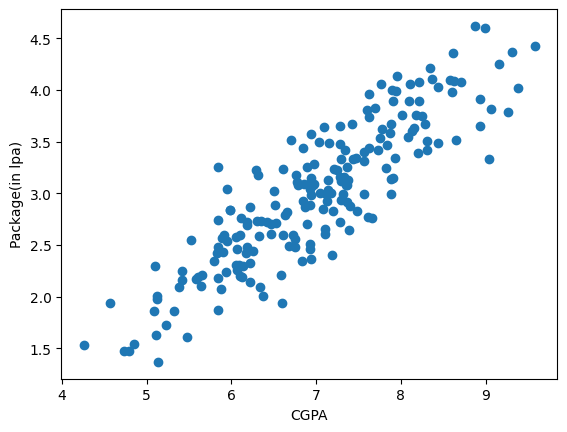

In [2]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [3]:
X = df.iloc[:,0:1] #cGPA
y = df.iloc[:,-1] #PACKAGE

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [5]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

Text(0, 0.5, 'Package(in lpa)')

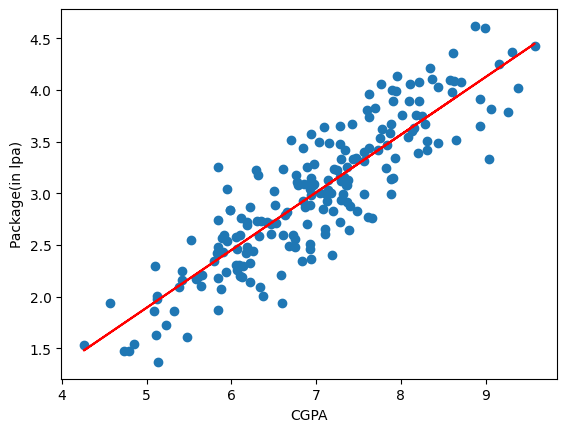

In [6]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [7]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [8]:
y_pred = lr.predict(X_test)
print(y_pred)
print(y_test.values)

[3.89111601 3.09324469 2.38464568 2.57434935 1.6537286  1.77647803
 2.07219258 2.93143862 3.76278706 2.93701814 4.09197872 3.51170867
 2.97049525 2.40138424 3.18809652 3.46707251 1.94386362 3.24389172
 2.97607477 3.41685683 2.55761079 3.16577844 2.85890486 3.12114229
 3.68467378 2.8700639  3.49497011 3.34432308 3.91901361 1.96060218
 3.65119666 3.2104146  3.74046898 2.7863711  2.78079158 3.27178932
 3.52844723 2.61340599 2.65804215 2.71383735]
[4.1  3.49 2.08 2.33 1.94 1.48 1.86 3.09 4.21 2.87 3.65 4.   2.89 2.6
 2.99 3.25 1.86 3.67 2.37 3.42 2.48 3.65 2.6  2.83 4.08 2.56 3.58 3.81
 4.09 2.01 3.63 2.92 3.51 1.94 2.21 3.34 3.34 3.23 2.01 2.61]


In [9]:
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 sCORE",r2_score(y_test,y_pred))


MAE 0.2884710931878175
MSE 0.12129235313495527
RMSE 0.34827051717731616
R2 sCORE 0.780730147510384


In [10]:
X_test.shape

(40, 1)

In [11]:
# Adjusted R2 score
r2 = r2_score(y_test,y_pred)
1 - ((1-r2)*(40-1)/(40-1-1))

0.7749598882343415

In [12]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.326300,3.26
1,5.12,0.039354,1.98
2,7.82,0.143758,3.25
3,7.42,0.753751,3.67
4,6.94,0.750218,3.57


Text(0, 0.5, 'Package(in lpa)')

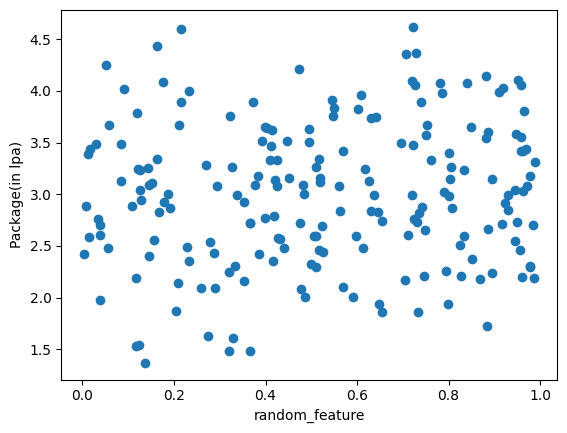

In [13]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [14]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
print("Adjusted R2 score",1 - ((1-r2)*(40-1)/(40-1-2)))

R2 score 0.7712153527394177
Adjusted R2 score 0.7588486150496565


In [15]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]
print(new_df2.head())

   cgpa    iq  package
0  6.89  4.36     3.26
1  5.12  0.78     1.98
2  7.82  4.35     3.25
3  7.42  2.57     3.67
4  6.94  2.57     3.57


Text(0, 0.5, 'Package(in lpa)')

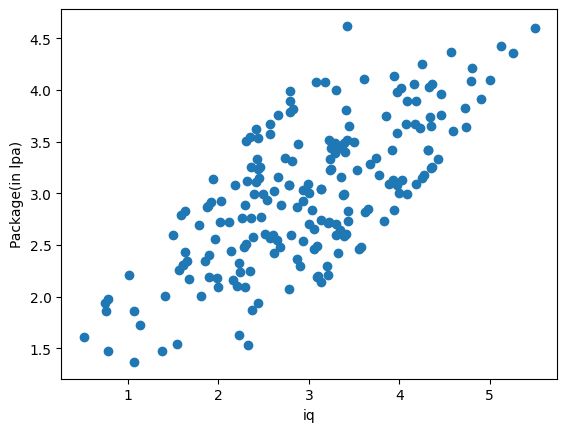

In [16]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [17]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
print("Adjusted R2 Score", 1 - ((1-r2)*(40-1)/(40-1-2)))

R2 score 0.859957437274694
Adjusted R2 Score 0.852387569019272
